In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [374]:
df = pd.read_csv('Train_Data.csv')
df = df.drop(['date'], axis=1)
df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [375]:
df.shape

(4571, 8)

In [376]:
df_num = df.select_dtypes(exclude="object")
df_num.describe().T.style.background_gradient(subset=['std'], cmap='Oranges')\
                            .background_gradient(subset=['50%'], cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
impressions,4571.000000,92.635747,198.349737,1.000000,6.000000,16.000000,84.000000,3239.000000
clicks,4571.000000,43.340844,100.164913,0.000000,2.000000,7.000000,38.000000,1771.000000
cost,4571.000000,2.800834,14.361618,0.000000,0.040000,0.210000,1.350000,531.250000
conversions,4571.000000,1.339094,5.223922,0.000000,0.000000,0.000000,1.000000,94.000000
revenue,4571.000000,231.865340,1091.742763,0.000000,0.000000,0.000000,92.600000,20515.410000


In [377]:
df.corr().style.background_gradient(cmap='GnBu')

,impressions,clicks,cost,conversions,revenue
impressions,1.000000,0.987514,0.682811,0.822149,0.759671
clicks,0.987514,1.000000,0.719925,0.856941,0.798282
cost,0.682811,0.719925,1.000000,0.672202,0.581662
conversions,0.822149,0.856941,0.672202,1.000000,0.964096
revenue,0.759671,0.798282,0.581662,0.964096,1.000000


In [378]:
df_cat = df.select_dtypes(include="object").columns.values

df_encoded = pd.get_dummies(df,columns = df_cat)

In [379]:
print("Shape before Encoding:",df.shape)
print("\nShape after Encoding:",df_encoded.shape)

Shape before Encoding: (4571, 8)

Shape after Encoding: (4571, 80)


In [380]:
df.isnull().sum().max()

0

In [381]:
X = df_encoded.drop(['revenue'], axis = 1)
y = df_encoded['revenue']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2021)

In [383]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

X_train: (3428, 79)
X_test: (1143, 79)
y_train: (3428,)
y_test: (1143,)


In [384]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [385]:
print("Linear Regression Training R2 score is",r2_score(y_train,lr.predict(X_train)))
print("Linear Regression Testing R2 score is",r2_score(y_test,lr.predict(X_test)))
print("-"*50)
print("Linear Regression Training mean_square_error is",mean_squared_error(y_train,lr.predict(X_train), squared=False))
print("Linear Regression Testing mean_square_error is",mean_squared_error(y_test,lr.predict(X_test), squared=False))
print("-"*50)
print("Linear Regression Training mean_absolute_error is",mean_absolute_error(y_train,lr.predict(X_train)))
print("Linear Regression Testing mean_absolute_error is",mean_absolute_error(y_test,lr.predict(X_test)))

Linear Regression Training R2 score is 0.9532969209605401
Linear Regression Testing R2 score is 0.910225518216041
--------------------------------------------------
Linear Regression Training mean_square_error is 254.4228308849826
Linear Regression Testing mean_square_error is 233.54455361407364
--------------------------------------------------
Linear Regression Training mean_absolute_error is 105.11235621057286
Linear Regression Testing mean_absolute_error is 110.91398681854223


In [386]:

lasso_model = Lasso()

lasso_model.fit(X_train,y_train)

Lasso()

In [387]:
## R2 score
print("Lasso Model Training R2 score is",r2_score(y_train,lasso_model.predict(X_train)))
print("Lasso Model Testing R2 score is",r2_score(y_test,lasso_model.predict(X_test)))
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error is",mean_squared_error(y_train,lasso_model.predict(X_train), squared=False))
print("Lasso Model Testing mean_square_error is",mean_squared_error(y_test,lasso_model.predict(X_test), squared=False))
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error is",mean_absolute_error(y_train,lasso_model.predict(X_train)))
print("Lasso Model Testing mean_absolute_error is",mean_absolute_error(y_test,lasso_model.predict(X_test)))

Lasso Model Training R2 score is 0.9493757002849668
Lasso Model Testing R2 score is 0.9215370709253627
--------------------------------------------------
Lasso Model Training mean_square_error is 264.8883377864779
Lasso Model Testing mean_square_error is 218.33610005669777
--------------------------------------------------
Lasso Model Training mean_absolute_error is 98.28550547443655
Lasso Model Testing mean_absolute_error is 98.7083997100839


In [388]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [389]:
## R2 score
print("Ridge Model Training R2 score is",r2_score(y_train,ridge.predict(X_train)))
print("Ridge Model Testing R2 score is",r2_score(y_test,ridge.predict(X_test)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error is",mean_squared_error(y_train,ridge.predict(X_train), squared=False))
print("Ridge Model Testing mean_square_error is",mean_squared_error(y_test,ridge.predict(X_test), squared=False))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error is",mean_absolute_error(y_train,ridge.predict(X_train)))
print("Ridge Model Testing mean_absolute_error is",mean_absolute_error(y_test,ridge.predict(X_test)))


Ridge Model Training R2 score is 0.9530989936541892
Ridge Model Testing R2 score is 0.9172933098560875
--------------------------------------------------
Ridge Model Training mean_square_error is 254.96138193980337
Ridge Model Testing mean_square_error is 224.16283516732543
--------------------------------------------------
Ridge Model Training mean_absolute_error is 104.79119636687767
Ridge Model Testing mean_absolute_error is 108.81762861656732


In [390]:
print(lr.score(X_test,y_test))
print(lasso_model.score(X_test,y_test))
print(ridge.score(X_test,y_test))

0.910225518216041
0.9215370709253627
0.9172933098560875


In [391]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [392]:
lasso_model_scaled = Lasso()

lasso_model_scaled.fit(X_train_scaled , y_train)

Lasso()

In [393]:
## R2 score
print("Lasso Model Training R2 score on scaled data is",r2_score(y_train,lasso_model_scaled.predict(X_train_scaled)))
print("Lasso Model Testing R2 score on scaled data is",r2_score(y_test,lasso_model_scaled.predict(X_test_scaled)))
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error on scaled data is",mean_squared_error(y_train,lasso_model_scaled.predict(X_train_scaled), squared=False))
print("Lasso Model Testing mean_square_error on scaled data is",mean_squared_error(y_test,lasso_model_scaled.predict(X_test_scaled), squared=False))
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error on scaled data is",mean_absolute_error(y_train,lasso_model_scaled.predict(X_train_scaled)))
print("Lasso Model Testing mean_absolute_error on scaled data is",mean_absolute_error(y_test,lasso_model_scaled.predict(X_test_scaled)))

Lasso Model Training R2 score on scaled data is 0.9530492310521754
Lasso Model Testing R2 score on scaled data is 0.9160231940662116
--------------------------------------------------
Lasso Model Training mean_square_error on scaled data is 255.09660481813177
Lasso Model Testing mean_square_error on scaled data is 225.8774969150057
--------------------------------------------------
Lasso Model Training mean_absolute_error on scaled data is 104.60912868692134
Lasso Model Testing mean_absolute_error on scaled data is 109.21621368736446


In [394]:

ridge_scaled = Ridge()

ridge_scaled.fit(X_train_scaled, y_train)

Ridge()

In [395]:
## R2 score
print("Ridge Model Training R2 score on scaled data is",r2_score(y_train,ridge_scaled.predict(X_train_scaled)))
print("Ridge Model Testing R2 score on scaled data is",r2_score(y_test,ridge_scaled.predict(X_test_scaled)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error on scaled data is",mean_squared_error(y_train,ridge_scaled.predict(X_train_scaled), squared=False))
print("Ridge Model Testing mean_square_error on scaled data is",mean_squared_error(y_test,ridge_scaled.predict(X_test_scaled), squared=False))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error on scaled data is",mean_absolute_error(y_train,ridge_scaled.predict(X_train_scaled)))
print("Ridge Model Testing mean_absolute_error on scaled data is",mean_absolute_error(y_test,ridge_scaled.predict(X_test_scaled)))

Ridge Model Training R2 score on scaled data is 0.9532951241997956
Ridge Model Testing R2 score on scaled data is 0.9108747765366108
--------------------------------------------------
Ridge Model Training mean_square_error on scaled data is 254.42772491518141
Ridge Model Testing mean_square_error on scaled data is 232.69851201187416
--------------------------------------------------
Ridge Model Training mean_absolute_error on scaled data is 105.24409445400192
Ridge Model Testing mean_absolute_error on scaled data is 110.94290932983358


In [396]:
ridge_cv = RidgeCV()

ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [397]:
## R2 score
print("Ridge Model CV Training R2 score on scaled data is",r2_score(y_train,ridge_cv.predict(X_train_scaled)))
print("Ridge Model CV Testing R2 score on scaled data is",r2_score(y_test,ridge_cv.predict(X_test_scaled)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model CV Training mean_square_error on scaled data is",mean_squared_error(y_train,ridge_cv.predict(X_train_scaled), squared=False))
print("Ridge Model CV Testing mean_square_error on scaled data is",mean_squared_error(y_test,ridge_cv.predict(X_test_scaled), squared=False))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model CV Training mean_absolute_error on scaled data is",mean_absolute_error(y_train,ridge_cv.predict(X_train_scaled)))
print("Ridge Model CV Testing mean_absolute_error on scaled data is",mean_absolute_error(y_test,ridge_cv.predict(X_test_scaled)))

Ridge Model CV Training R2 score on scaled data is 0.9531800132382238
Ridge Model CV Testing R2 score on scaled data is 0.915206879208158
--------------------------------------------------
Ridge Model CV Training mean_square_error on scaled data is 254.74106903601566
Ridge Model CV Testing mean_square_error on scaled data is 226.9726875789495
--------------------------------------------------
Ridge Model CV Training mean_absolute_error on scaled data is 106.24434617881279
Ridge Model CV Testing mean_absolute_error on scaled data is 111.05913237523312


In [398]:
print(lr.score(X_test,y_test))
print(lasso_model.score(X_test,y_test))
print(ridge.score(X_test,y_test))


0.910225518216041
0.9215370709253627
0.9172933098560875


In [399]:
print(lasso_model_scaled.score(X_test,y_test))
print(ridge_scaled.score(X_test,y_test))
print(ridge_cv.score(X_test,y_test))

-602.9711192936882
-1571.5942435043046
-815.4785003173041


In [400]:
a=ridge_cv.predict(X_test)
j=0;
for i in a:
    if(i<0):
        a[j]=0
    j=j+1
        
dict = {'revenue': a}
ans = pd.DataFrame(dict)
ans.set_index('revenue', inplace = True)
ans

""
revenue
0.0
0.0
0.0
0.0
0.0
...
0.0
0.0
0.0


In [401]:
ans.to_csv('sss.csv')

In [402]:
mean_squared_error(y_test, a , squared=False)

816.3599547017429

In [403]:
import scipy.stats as stat
import pylab

def plot_data(df, feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [404]:
result = df.select_dtypes(exclude="object")
result

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71
...,...,...,...,...,...
4566,19,6,0.07,0,0.00
4567,1,0,0.00,0,0.00
4568,16,8,0.12,1,93.20
4569,37,13,0.23,0,0.00


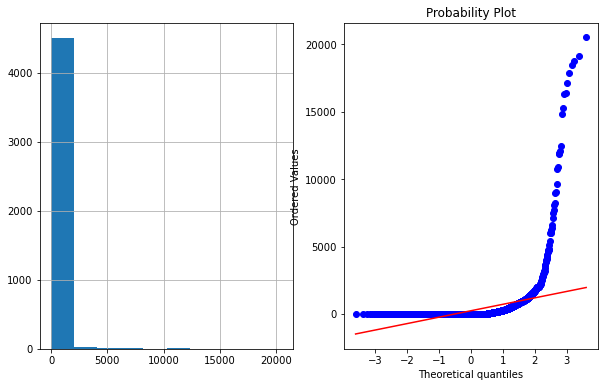

In [405]:
plot_data(result,'revenue')

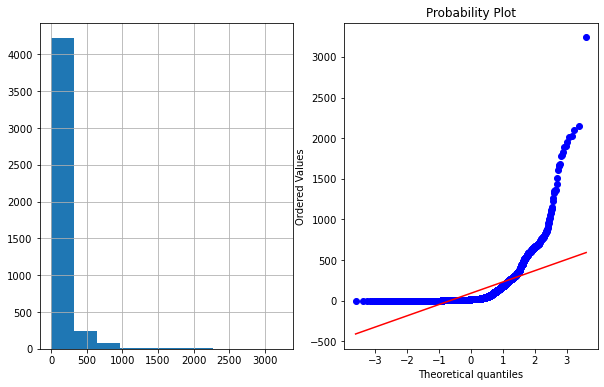

In [406]:
plot_data(result,'impressions')

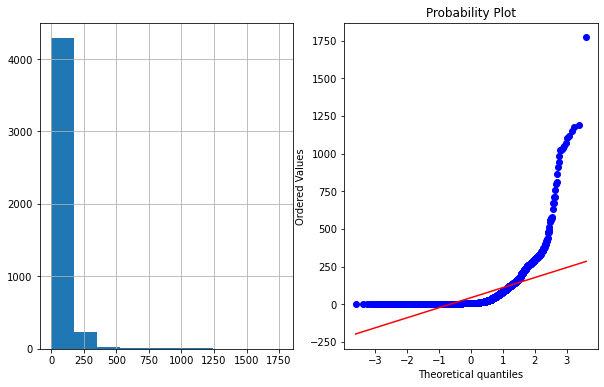

In [407]:
plot_data(result,'clicks')

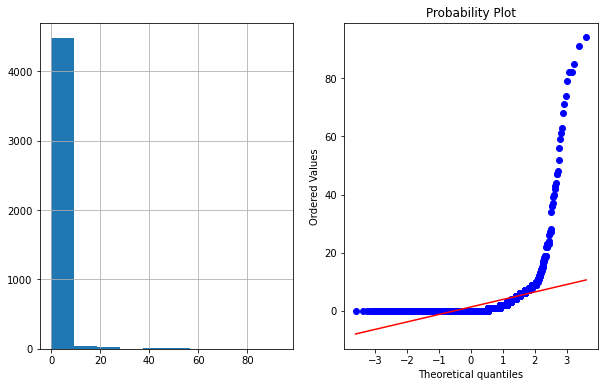

In [408]:
plot_data(result,'conversions')

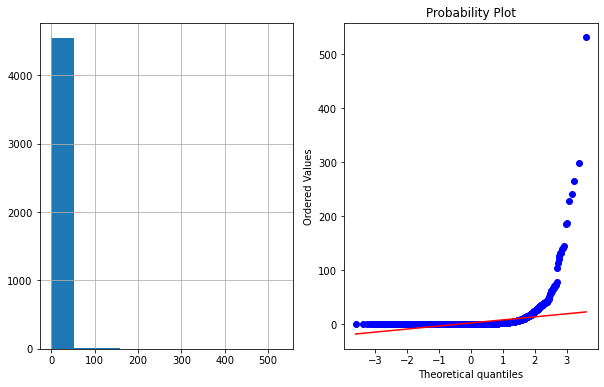

In [409]:
plot_data(result,'cost')

In [410]:
# result['revenue_log'] = np.log1p(result['revenue'])
# plot_data(result, 'revenue_log')

In [411]:
result

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71
...,...,...,...,...,...
4566,19,6,0.07,0,0.00
4567,1,0,0.00,0,0.00
4568,16,8,0.12,1,93.20
4569,37,13,0.23,0,0.00


<ipython-input-412-eeeb14ef7933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['revenue_sqrt_log'] = np.log1p(df.revenue)


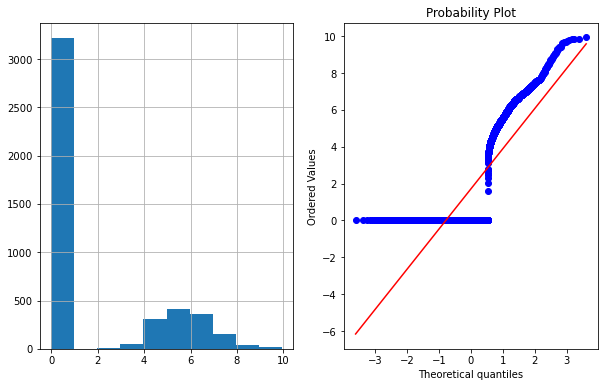

In [412]:
result['revenue_sqrt_log'] = np.log1p(df.revenue)
plot_data(result, 'revenue_sqrt_log')

In [413]:
# result['revenue_exp'] = df.revenue**(1/1.2)
# plot_data(result, 'revenue_exp')

In [414]:
# result['revenue_box'], pp = stat.boxcox(result['revenue']+1) 

In [415]:
# plot_data(result, 'revenue_box')

<ipython-input-416-f3ef1b5456c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['impressions_log'] = np.log1p(result['impressions'])


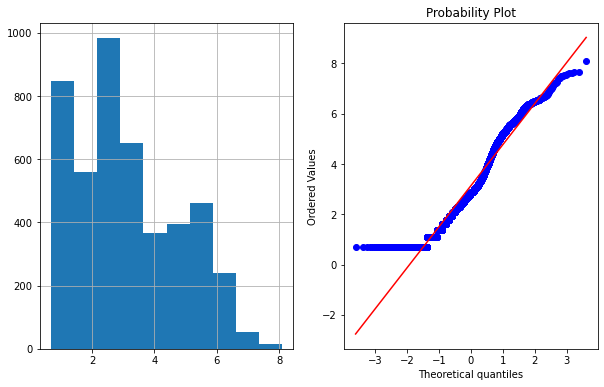

In [416]:
result['impressions_log'] = np.log1p(result['impressions'])
plot_data(result, 'impressions_log')    

In [417]:
# result['impressions_sqrt'] = df.impressions**(1/1.2)
# plot_data(result, 'impressions_sqrt') 

In [418]:
# result['impressions_box'], pp = stat.boxcox(result['impressions']+1) 

In [419]:
# plot_data(result, 'impressions_box')

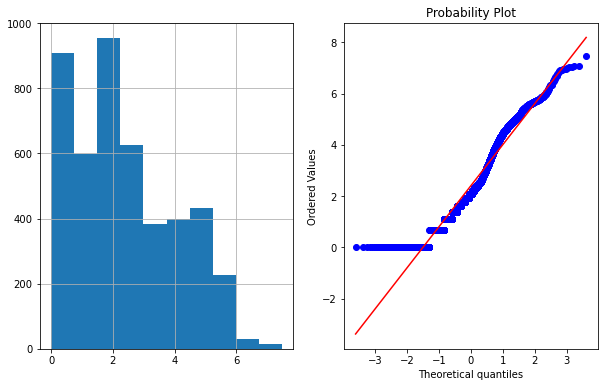

In [420]:
result['clicks_log'] = np.log1p(result['clicks'])
plot_data(result, 'clicks_log')

In [421]:
# result['cost_log'] = np.log1p(result['cost'])
# plot_data(result, 'cost_log')

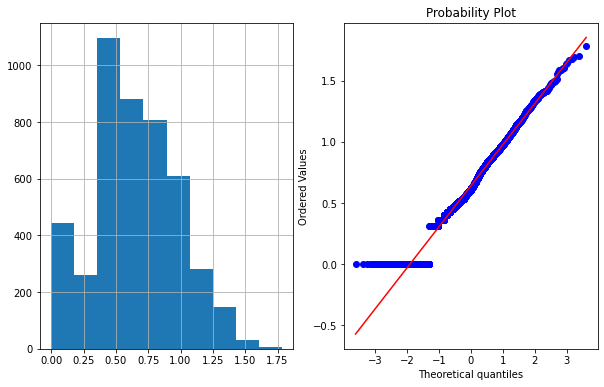

In [422]:
result['cost_sqrt'] = np.log1p(result.cost**(1/2))**(1/2)
plot_data(result, 'cost_sqrt')

In [423]:
# result['cost_box'], pp = stat.boxcox(result['cost']+1) 
# plot_data(result, 'cost_box')

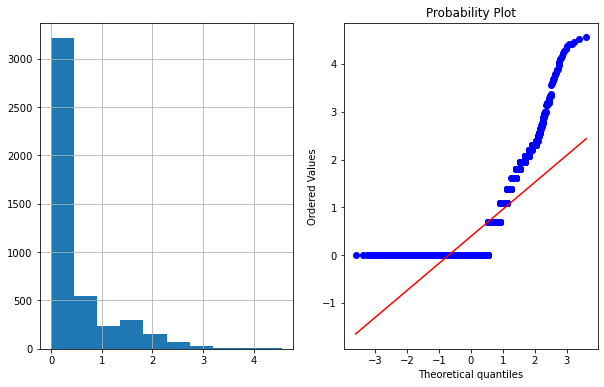

In [424]:
result['conversions_log'] =np.log1p(result['conversions'])
plot_data(result, 'conversions_log')

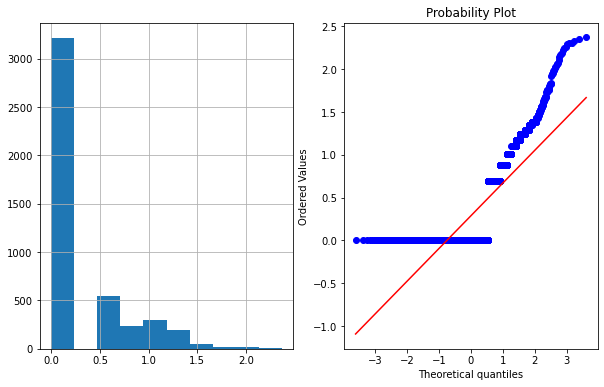

In [425]:
result['conversions_log'] = np.log1p(result.conversions**(1/2))
plot_data(result, 'conversions_log')

In [426]:
# result['conversions_box'], pp = stat.boxcox(result['conversions']+2) 
# plot_data(result, 'conversions_box')

In [427]:
# df_encoded

In [428]:
df_encoded['revenue'] = np.log1p(df_encoded.revenue)

In [429]:
df_encoded['cost'] = np.log1p(df_encoded.cost**(1/2))**(1/2)

In [430]:
df_encoded['clicks'] = np.log1p(df_encoded['clicks'])


In [431]:
df_encoded['impressions'] = np.log1p(df_encoded['impressions'])

In [432]:
df_encoded['conversions'] =np.log1p(df_encoded['conversions'])

In [433]:
df_encoded.shape

(4571, 80)

In [434]:
X = df_encoded.drop(['revenue'], axis = 1)
y = df_encoded['revenue']

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2021)

In [436]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

X_train: (3428, 79)
X_test: (1143, 79)
y_train: (3428,)
y_test: (1143,)
